In [1]:
cd ..

/home/jovyan/portfolio/ames_housing_data_model_development


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import lib.eda as eda
%matplotlib inline


# Impute NaNs

In [3]:
ames_train_df = pd.read_csv('data/train.csv')
ames_test_df = pd.read_csv('data/test.csv')

In [6]:
for col in ames_train_df:
    print("{:20} {}".format(col, ames_train_df[col].dtype))

Id                   int64
MSSubClass           int64
MSZoning             object
LotFrontage          float64
LotArea              int64
Street               object
Alley                object
LotShape             object
LandContour          object
Utilities            object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea           float64
ExterQual            object
ExterCond            object
Foundation           object
BsmtQual             object
BsmtCond             object
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1           int64
BsmtFinType2         objec

In [4]:
ames_train_df.shape, ames_test_df.shape

((1460, 81), (1459, 80))

In [5]:
ames_train_df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
552,553,20,RL,87.0,11146,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,255500
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500
679,680,20,RL,NaN,9945,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,128500
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


In [6]:
ames_train_df = ames_train_df.set_index('Id')
ames_test_df = ames_test_df.set_index('Id')

In [7]:
ames_train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Which features are numerical and categorical?

According the `data_description.txt` file `MSSubClass` is a categorical feature that is encoded with numerical values.

In [8]:
ames_train_df.MSSubClass.dtype, ames_test_df.MSSubClass.dtype

(dtype('int64'), dtype('int64'))

In [9]:
ames_train_df.MSSubClass = ames_train_df.MSSubClass.astype('object')
ames_test_df.MSSubClass = ames_test_df.MSSubClass.astype('object')

### Identify Features with Null Values

In [10]:
eda.identify_nulls(ames_train_df, ames_test_df)

LotFrontage          float64    null values:    259 null test values: 227
Alley                object     null values:   1369 null test values: 1352
MasVnrType           object     null values:      8 null test values: 16
MasVnrArea           float64    null values:      8 null test values: 15
BsmtQual             object     null values:     37 null test values: 44
BsmtCond             object     null values:     37 null test values: 45
BsmtExposure         object     null values:     38 null test values: 44
BsmtFinType1         object     null values:     37 null test values: 42
BsmtFinType2         object     null values:     38 null test values: 42
Electrical           object     null values:      1 null test values: 0
FireplaceQu          object     null values:    690 null test values: 730
GarageType           object     null values:     81 null test values: 76
GarageYrBlt          float64    null values:     81 null test values: 78
GarageFinish         object     null values:    

Each of these will require special handling.

#### `LotFrontage`

From `data_description.txt`:

    LotFrontage: Linear feet of street connected to property

train  LotFrontage          float64    null values: 259 
test   LotFrontage          float64    null values: 227 


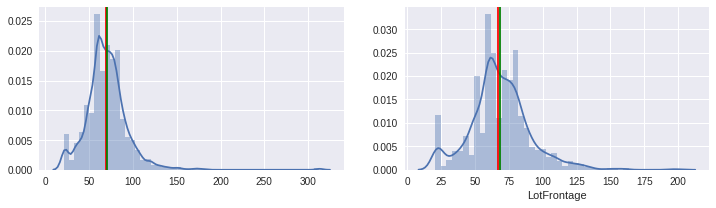

In [11]:
eda.feature_null_info_train_test(ames_train_df, ames_test_df, 'LotFrontage', False)
eda.feat_dist_plot(ames_train_df, ames_test_df, 'LotFrontage')

Note that mean and median for this continuous feature are largely indistinguishable. We will replace `nan` values with the mean.

In [12]:
ames_train_df.LotFrontage = ames_train_df.LotFrontage.fillna(ames_train_df.LotFrontage.mean())
ames_test_df.LotFrontage = ames_test_df.LotFrontage.fillna(ames_test_df.LotFrontage.mean())

In [13]:
assert sum(ames_train_df.LotFrontage.isnull()) == 0
assert sum(ames_test_df.LotFrontage.isnull()) == 0

#### `Alley`

From `data_description.txt`:

    Alley: Type of alley access to property

           Grvl	Gravel
           Pave	Paved
           NA 	No alley access

In [14]:
eda.feature_null_info_train_test(ames_train_df, ames_test_df, 'Alley', True)

train  Alley                object     null values: 1369 [nan 'Grvl' 'Pave']
test   Alley                object     null values: 1352 [nan 'Pave' 'Grvl']


For this categorical feature, we will assign `nan` to signify that the house has 'None'.

In [15]:
ames_train_df.Alley = ames_train_df.Alley.fillna('None')
ames_test_df.Alley = ames_test_df.Alley.fillna('None')

In [16]:
assert sum(ames_train_df.Alley.isnull()) == 0
assert sum(ames_test_df.Alley.isnull()) == 0

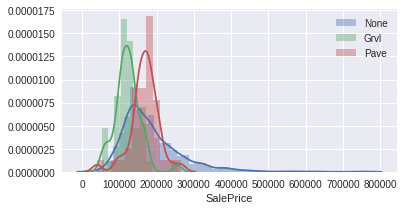

In [17]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['Alley'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['Alley']==val], label=val)
plt.legend()

Note the clear correlations between alley access type and sale price.

#### `MasVnrType`

From `data_description.txt`:

    MasVnrType: Masonry veneer type

           BrkCmn	Brick Common
           BrkFace	Brick Face
           CBlock	Cinder Block
           None	None
           Stone	Stone

In [18]:
eda.feature_info(ames_train_df, 'MasVnrType')
eda.feature_info(ames_test_df, 'MasVnrType')

MasVnrType           object     null values: 8 ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrType           object     null values: 16 ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]


This categorical feature is a bit ambiguous. Note that it includes a `None` attribute a priori and also that `CBlock`, listed in the data description appears to be missing in the dataset. Could it be that `nan` should be the missing attribute `CBlock`? or should `nan` be taken as additional `None` values. 

Both transformations will be stored here. For model fitting only one will be used.

In [19]:
ames_train_df['MasVnrType_1'] = ames_train_df['MasVnrType'].fillna('CBlock')
ames_test_df['MasVnrType_1'] = ames_test_df['MasVnrType'].fillna('CBlock')
ames_train_df['MasVnrType_2'] = ames_train_df['MasVnrType'].fillna('None')
ames_test_df['MasVnrType_2'] = ames_test_df['MasVnrType'].fillna('None')

In [20]:
MasVnrType_train = ames_train_df['MasVnrType']
MasVnrType_test = ames_test_df['MasVnrType']
ames_train_df.drop('MasVnrType', axis=1, inplace=True)
ames_test_df.drop('MasVnrType', axis=1, inplace=True)

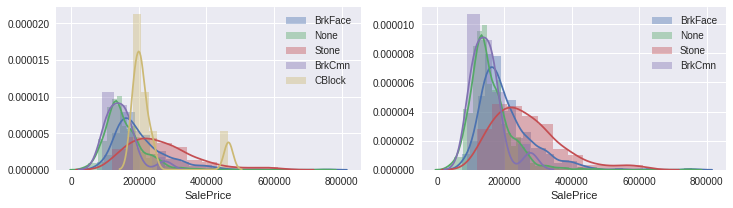

In [21]:
fig = plt.figure(figsize=(12,3))
fig.add_subplot(1,2,1)
for val in ames_train_df['MasVnrType_1'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['MasVnrType_1']==val], label=val)
plt.legend()
fig.add_subplot(1,2,2)
for val in ames_train_df['MasVnrType_2'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['MasVnrType_2']==val], label=val)
plt.legend()

#### `MasVnrArea`

From `data_description.txt`:

    MasVnrArea: Masonry veneer area in square feet

In [22]:
eda.feature_info(ames_train_df, 'MasVnrArea', False)
eda.feature_info(ames_test_df, 'MasVnrArea', False)

MasVnrArea           float64    null values: 8 
MasVnrArea           float64    null values: 15 


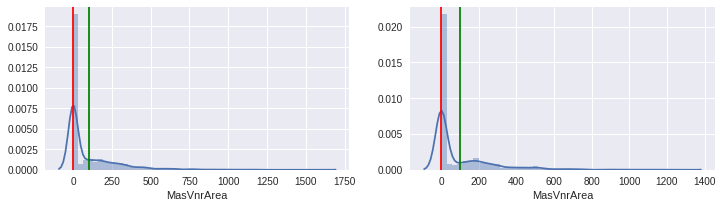

In [23]:
fig = plt.figure(figsize=(12,3))
fig.add_subplot(1,2,1)
sns.distplot(ames_train_df.MasVnrArea.dropna())
plt.axvline(ames_train_df.MasVnrArea.median(), c='red')
plt.axvline(ames_train_df.MasVnrArea.mean(), c='green')
fig.add_subplot(1,2,2)
sns.distplot(ames_test_df.MasVnrArea.dropna())
plt.axvline(ames_test_df.MasVnrArea.median(), c='red')
plt.axvline(ames_test_df.MasVnrArea.mean(), c='green')

The distribution of this numerical feature is heavily skewed, no doubt influenced by the large number of 0s. 

#### The Null Area values correspond to the Null Type values

In [24]:
ames_train_df['MasVnrArea'][MasVnrType_train.isnull()]

Id
235    NaN
530    NaN
651    NaN
937    NaN
974    NaN
978    NaN
1244   NaN
1279   NaN
Name: MasVnrArea, dtype: float64

In [25]:
ames_test_df['MasVnrArea'][MasVnrType_test.isnull()]

Id
1692      NaN
1707      NaN
1883      NaN
1993      NaN
2005      NaN
2042      NaN
2312      NaN
2326      NaN
2341      NaN
2350      NaN
2369      NaN
2593      NaN
2611    198.0
2658      NaN
2687      NaN
2863      NaN
Name: MasVnrArea, dtype: float64

Considering this, we will need to take two approaches for area as well.

In [26]:
(ames_train_df['MasVnrArea'][MasVnrType_train == 'None'].median(),
 ames_test_df['MasVnrArea'][MasVnrType_test == 'None'].median())

(0.0, 0.0)

In [27]:
(ames_train_df['MasVnrArea'][MasVnrType_train != 'None'].mean(),
 ames_test_df['MasVnrArea'][MasVnrType_test != 'None'].mean())

(254.43027210884352, 256.42756183745581)

For approach 1, where we assumed that the `nan` represented the missing class, we will fill this value with the mean for all non-`None` classes.

For approach 2, where we assumed that the `nan` represented `None`, we will fill this value with the median of the `None` class, 0.

In [28]:
ames_train_df['MasVnrArea_1'] = ames_train_df['MasVnrArea'].fillna(ames_train_df['MasVnrArea'][MasVnrType_train != 'None'].mean())
ames_test_df['MasVnrArea_1'] = ames_test_df['MasVnrArea'].fillna(ames_test_df['MasVnrArea'][MasVnrType_test != 'None'].mean())
ames_train_df['MasVnrArea_2'] = ames_train_df['MasVnrArea'].fillna(0)
ames_test_df['MasVnrArea_2'] = ames_test_df['MasVnrArea'].fillna(0)

In [29]:
MasVnrArea_train = ames_train_df['MasVnrArea']
MasVnrArea_test = ames_test_df['MasVnrArea']
ames_train_df.drop('MasVnrArea', axis=1, inplace=True)
ames_test_df.drop('MasVnrArea', axis=1, inplace=True)

#### `BsmtQual`

    BsmtQual: Evaluates the height of the basement

           Ex	Excellent (100+ inches)	
           Gd	Good (90-99 inches)
           TA	Typical (80-89 inches)
           Fa	Fair (70-79 inches)
           Po	Poor (<70 inches
           NA	No Basement

In [30]:
eda.feature_info(ames_train_df, 'BsmtQual')
eda.feature_info(ames_test_df, 'BsmtQual')

BsmtQual             object     null values: 37 ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtQual             object     null values: 44 ['TA' 'Gd' 'Ex' 'Fa' nan]


In [31]:
ames_train_df['BsmtQual'] = ames_train_df['BsmtQual'].fillna('None')
ames_test_df['BsmtQual'] = ames_test_df['BsmtQual'].fillna('None')

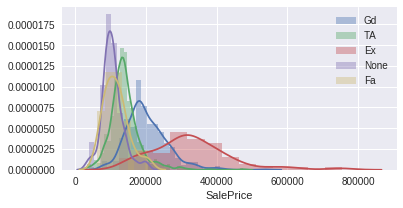

In [32]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['BsmtQual'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['BsmtQual']==val], label=val)
plt.legend()

#### `BsmtCond`

    BsmtCond: Evaluates the general condition of the basement

           Ex	Excellent
           Gd	Good
           TA	Typical - slight dampness allowed
           Fa	Fair - dampness or some cracking or settling
           Po	Poor - Severe cracking, settling, or wetness
           NA	No Basement

In [33]:
eda.feature_info(ames_train_df, 'BsmtCond')
eda.feature_info(ames_test_df, 'BsmtCond')

BsmtCond             object     null values: 37 ['TA' 'Gd' nan 'Fa' 'Po']
BsmtCond             object     null values: 45 ['TA' 'Po' 'Fa' 'Gd' nan]


In [34]:
ames_train_df['BsmtCond'] = ames_train_df['BsmtCond'].fillna('None')
ames_test_df['BsmtCond'] = ames_test_df['BsmtCond'].fillna('None')

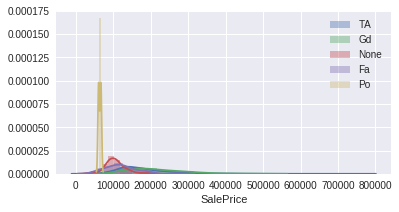

In [35]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['BsmtCond'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['BsmtCond']==val], label=val)
plt.legend()

#### `BsmtExposure`
	
    BsmtExposure: Refers to walkout or garden level walls

           Gd	Good Exposure
           Av	Average Exposure (split levels or foyers typically score average or above)	
           Mn	Mimimum Exposure
           No	No Exposure
           NA	No Basement

In [36]:
eda.feature_info(ames_train_df, 'BsmtExposure')
eda.feature_info(ames_test_df, 'BsmtExposure')

BsmtExposure         object     null values: 38 ['No' 'Gd' 'Mn' 'Av' nan]
BsmtExposure         object     null values: 44 ['No' 'Gd' 'Mn' 'Av' nan]


In [37]:
ames_train_df['BsmtExposure'] = ames_train_df['BsmtExposure'].fillna('None')
ames_test_df['BsmtExposure'] = ames_test_df['BsmtExposure'].fillna('None')

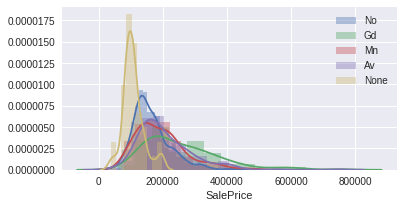

In [38]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['BsmtExposure'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['BsmtExposure']==val], label=val)
plt.legend()

#### `BsmtFinType1` 

    BsmtFinType1: Rating of basement finished area

           GLQ	Good Living Quarters
           ALQ	Average Living Quarters
           BLQ	Below Average Living Quarters	
           Rec	Average Rec Room
           LwQ	Low Quality
           Unf	Unfinshed
           NA	No Basement

In [39]:
eda.feature_info(ames_train_df, 'BsmtFinType1')
eda.feature_info(ames_test_df, 'BsmtFinType1')

BsmtFinType1         object     null values: 37 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType1         object     null values: 42 ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]


In [40]:
ames_train_df['BsmtFinType1'] = ames_train_df['BsmtFinType1'].fillna('None')
ames_test_df['BsmtFinType1'] = ames_test_df['BsmtFinType1'].fillna('None')

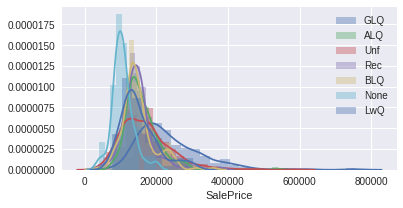

In [41]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['BsmtFinType1'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['BsmtFinType1']==val], label=val)
plt.legend()

#### `BsmtFinType2` 

    BsmtFinType2: Rating of basement finished area

           GLQ	Good Living Quarters
           ALQ	Average Living Quarters
           BLQ	Below Average Living Quarters	
           Rec	Average Rec Room
           LwQ	Low Quality
           Unf	Unfinshed
           NA	No Basement

In [42]:
eda.feature_info(ames_train_df, 'BsmtFinType2')
eda.feature_info(ames_test_df, 'BsmtFinType2')

BsmtFinType2         object     null values: 38 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType2         object     null values: 42 ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


In [43]:
ames_train_df['BsmtFinType2'] = ames_train_df['BsmtFinType2'].fillna('None')
ames_test_df['BsmtFinType2'] = ames_test_df['BsmtFinType2'].fillna('None')

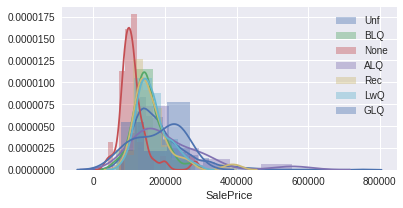

In [44]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['BsmtFinType2'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['BsmtFinType2']==val], label=val)
plt.legend()

#### `Electrical` 

    Electrical: Electrical system

           SBrkr	Standard Circuit Breakers & Romex
           FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
           FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
           FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
           Mix	Mixed

In [45]:
eda.feature_info(ames_train_df, 'Electrical')
eda.feature_info(ames_test_df, 'Electrical')

Electrical           object     null values: 1 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
Electrical           object     null values: 0 ['SBrkr' 'FuseA' 'FuseF' 'FuseP']


In [46]:
null_electrical = ames_train_df[ames_train_df.Electrical.isnull()].index

The `nan` for `Electrical` seems to simply be a strange value. Note that there are no `nan` values in the test data. This row will be dropped from the training data. 

In [47]:
ames_train_df.shape

(1460, 82)

In [48]:
ames_train_df = ames_train_df.drop(null_electrical)

In [49]:
ames_train_df.shape

(1459, 82)

#### `FireplaceQu` 

    FireplaceQu: Fireplace quality

           Ex	Excellent - Exceptional Masonry Fireplace
           Gd	Good - Masonry Fireplace in main level
           TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
           Fa	Fair - Prefabricated Fireplace in basement
           Po	Poor - Ben Franklin Stove
           NA	No Fireplace

In [50]:
eda.feature_info(ames_train_df, 'FireplaceQu')
eda.feature_info(ames_test_df, 'FireplaceQu')

FireplaceQu          object     null values: 689 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
FireplaceQu          object     null values: 730 [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


In [51]:
ames_train_df['FireplaceQu'] = ames_train_df['FireplaceQu'].fillna('None')
ames_test_df['FireplaceQu'] = ames_test_df['FireplaceQu'].fillna('None')

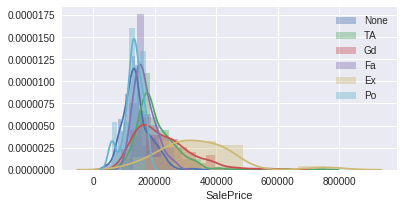

In [52]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['FireplaceQu'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['FireplaceQu']==val], label=val)
plt.legend()

#### `GarageType` 

    GarageType: Garage location

           2Types	More than one type of garage
           Attchd	Attached to home
           Basment	Basement Garage
           BuiltIn	Built-In (Garage part of house - typically has room above garage)
           CarPort	Car Port
           Detchd	Detached from home
           NA	No Garage

In [53]:
eda.feature_info(ames_train_df, 'GarageType')
eda.feature_info(ames_test_df, 'GarageType')

GarageType           object     null values: 81 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageType           object     null values: 76 ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']


In [54]:
ames_train_df['GarageType'] = ames_train_df['GarageType'].fillna('None')
ames_test_df['GarageType'] = ames_test_df['GarageType'].fillna('None')

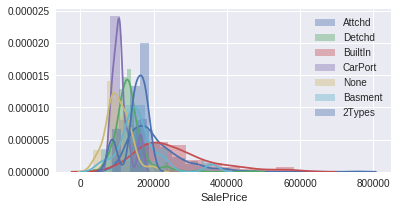

In [55]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['GarageType'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['GarageType']==val], label=val)
plt.legend()

#### `GarageYrBlt`

    GarageYrBlt: Year garage was built
    
Certainly the `nan` values in this numerical category correspond.

In [56]:
eda.feature_info(ames_train_df, 'GarageYrBlt', False)
eda.feature_info(ames_test_df, 'GarageYrBlt', False)

GarageYrBlt          float64    null values: 81 
GarageYrBlt          float64    null values: 78 


In [57]:
(sum(ames_train_df[ames_train_df['GarageType'] == 'None']['GarageYrBlt'].isnull()),
 sum(ames_test_df[ames_test_df['GarageType'] == 'None']['GarageYrBlt'].isnull()))

(81, 76)

Apparently, there are two values in the test set for which this is not true.


In [58]:
ames_test_df[(ames_test_df['GarageYrBlt'].isnull()) & (ames_test_df['GarageType'] != 'None')]['GarageType']

Id
2127    Detchd
2577    Detchd
Name: GarageType, dtype: object

##### First deal with `None`

To handle this we will convert the `GarageYrBlt` to a categorical variable and then use `None` for one category.

In [59]:
ames_train_df['GarageYrBlt'].values

array([ 2003.,  1976.,  2001., ...,  1941.,  1950.,  1965.])

In [60]:
_, deciles = pd.qcut(ames_train_df['GarageYrBlt'], 10, retbins=True)

In [61]:
deciles

array([ 1900.,  1945.,  1957.,  1965.,  1973.,  1980.,  1993.,  1999.,
        2004.,  2006.,  2010.])

In [62]:
GarageYrBlt = ames_train_df['GarageYrBlt'].copy()
GarageYrBlt[GarageYrBlt < deciles[1]] = 0
GarageYrBlt[GarageYrBlt >= deciles[9]] = 9
for i in range(1,9):
    GarageYrBlt[(GarageYrBlt >= deciles[i]) & (GarageYrBlt < deciles[i+1])] = i
ames_train_df['GarageYrBlt'] = GarageYrBlt

In [63]:
GarageYrBlt = ames_test_df['GarageYrBlt'].copy()
GarageYrBlt[GarageYrBlt < deciles[1]] = 0
GarageYrBlt[GarageYrBlt >= deciles[9]] = 9
for i in range(1,9):
    GarageYrBlt[(GarageYrBlt >= deciles[i]) & (GarageYrBlt < deciles[i+1])] = i
ames_test_df['GarageYrBlt'] = GarageYrBlt

In [88]:
ames_test_df['GarageYrBlt'].unique(), ames_train_df['GarageYrBlt'].unique()

(array(['None', 4.0], dtype=object),
 array([7.0, 4.0, 6.0, 8.0, 0.0, 3.0, 2.0, 9.0, 5.0, 1.0, 'None'], dtype=object))

Then we set the two points with null year built for the test set to th emeidan value.

In [64]:
ames_test_df['GarageYrBlt'] = \
 (ames_test_df[ames_test_df['GarageYrBlt'].isnull() & 
              (ames_test_df['GarageType'] != 'None')]['GarageYrBlt']
 .fillna(ames_test_df['GarageYrBlt'].median()))

In [65]:
ames_train_df['GarageYrBlt'] = ames_train_df['GarageYrBlt'].fillna('None')
ames_test_df['GarageYrBlt'] = ames_test_df['GarageYrBlt'].fillna('None')

In [66]:
sum(ames_train_df['GarageYrBlt'].isnull()), sum(ames_test_df['GarageYrBlt'].isnull())

(0, 0)

#### `GarageFinish` 

    GarageFinish: Interior finish of the garage

           Fin	Finished
           RFn	Rough Finished	
           Unf	Unfinished
           NA	No Garage

In [67]:
eda.feature_info(ames_train_df, 'GarageFinish')
eda.feature_info(ames_test_df, 'GarageFinish')

GarageFinish         object     null values: 81 ['RFn' 'Unf' 'Fin' nan]
GarageFinish         object     null values: 78 ['Unf' 'Fin' 'RFn' nan]


In [68]:
ames_train_df['GarageFinish'] = ames_train_df['GarageFinish'].fillna('None')
ames_test_df['GarageFinish'] = ames_test_df['GarageFinish'].fillna('None')

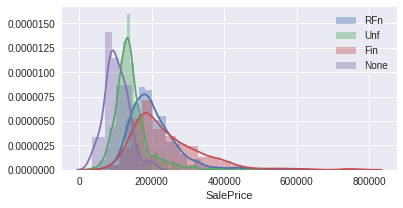

In [69]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['GarageFinish'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['GarageFinish']==val], label=val)
plt.legend()

#### `GarageQual` 

    GarageQual: Garage quality

           Ex	Excellent
           Gd	Good
           TA	Typical/Average
           Fa	Fair
           Po	Poor
           NA	No Garage

In [70]:
eda.feature_info(ames_train_df, 'GarageQual')
eda.feature_info(ames_test_df, 'GarageQual')

GarageQual           object     null values: 81 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageQual           object     null values: 78 ['TA' nan 'Fa' 'Gd' 'Po']


In [71]:
ames_train_df['GarageQual'] = ames_train_df['GarageQual'].fillna('None')
ames_test_df['GarageQual'] = ames_test_df['GarageQual'].fillna('None')

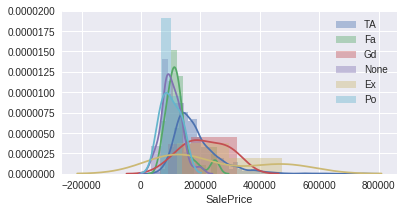

In [72]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['GarageQual'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['GarageQual']==val], label=val)
plt.legend()

#### `GarageCond` 
		
    GarageCond: Garage condition

           Ex	Excellent
           Gd	Good
           TA	Typical/Average
           Fa	Fair
           Po	Poor
           NA	No Garage

In [73]:
eda.feature_info(ames_train_df, 'GarageCond')
eda.feature_info(ames_test_df, 'GarageCond')

GarageCond           object     null values: 81 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageCond           object     null values: 78 ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


In [74]:
ames_train_df['GarageCond'] = ames_train_df['GarageCond'].fillna('None')
ames_test_df['GarageCond'] = ames_test_df['GarageCond'].fillna('None')

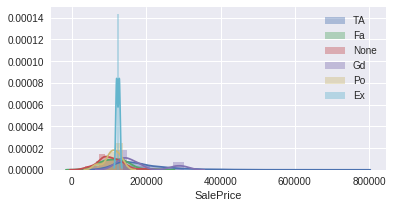

In [75]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['GarageCond'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['GarageCond']==val], label=val)
plt.legend()

#### `PoolQC` 
		
    PoolQC: Pool quality

           Ex	Excellent
           Gd	Good
           TA	Average/Typical
           Fa	Fair
           NA	No Pool

In [76]:
eda.feature_info(ames_train_df, 'PoolQC')
eda.feature_info(ames_test_df, 'PoolQC')

PoolQC               object     null values: 1452 [nan 'Ex' 'Fa' 'Gd']
PoolQC               object     null values: 1456 [nan 'Ex' 'Gd']


In [77]:
ames_train_df['PoolQC'] = ames_train_df['PoolQC'].fillna('None')
ames_test_df['PoolQC'] = ames_test_df['PoolQC'].fillna('None')

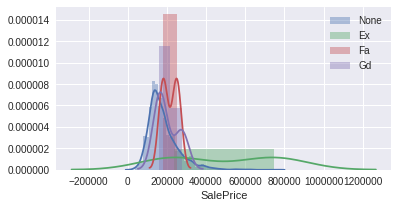

In [78]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['PoolQC'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['PoolQC']==val], label=val)
plt.legend()

#### `Fence` 
		
    Fence: Fence quality

           GdPrv	Good Privacy
           MnPrv	Minimum Privacy
           GdWo	Good Wood
           MnWw	Minimum Wood/Wire
           NA	No Fence


In [79]:
eda.feature_info(ames_train_df, 'Fence')
eda.feature_info(ames_test_df, 'Fence')

Fence                object     null values: 1178 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Fence                object     null values: 1169 ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']


In [80]:
ames_train_df['Fence'] = ames_train_df['Fence'].fillna('None')
ames_test_df['Fence'] = ames_test_df['Fence'].fillna('None')

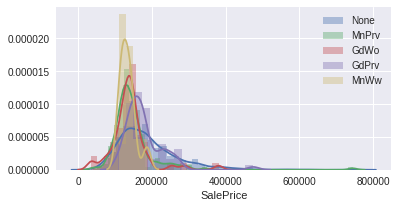

In [81]:
fig = plt.figure(figsize=(6,3))
for val in ames_train_df['Fence'].unique():    
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['Fence']==val], label=val)
plt.legend()

#### `MiscFeature` 
		
    MiscFeature: Miscellaneous feature not covered in other categories

In [82]:
eda.feature_info(ames_train_df, 'MiscFeature')
eda.feature_info(ames_test_df, 'MiscFeature')

MiscFeature          object     null values: 1405 [nan 'Shed' 'Gar2' 'Othr' 'TenC']
MiscFeature          object     null values: 1408 [nan 'Gar2' 'Shed' 'Othr']


In [83]:
ames_train_df['MiscFeature'] = ames_train_df['MiscFeature'].fillna('None')
ames_test_df['MiscFeature'] = ames_test_df['MiscFeature'].fillna('None')

In [84]:
ames_train_df[ames_train_df['MiscFeature']=='TenC']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_1,MasVnrType_2,MasVnrArea_1,MasVnrArea_2
Id,,,,,,,,,,,,,,,,,,,,,
1387,60,RL,80.0,16692,Pave,None,IR1,Lvl,AllPub,Inside,...,2000,7,2006,WD,Normal,250000,BrkFace,BrkFace,184.0,184.0


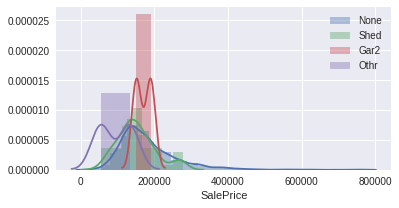

In [85]:
fig = plt.figure(figsize=(6,3))
misc = list(ames_train_df['MiscFeature'].unique())
misc.remove('TenC')
for val in misc: 
    sns.distplot(ames_train_df['SalePrice'][ames_train_df['MiscFeature']==val], label=val)
plt.legend()

In [86]:
for col in ames_train_df.columns:
    null_train_values = sum(ames_train_df[col].isnull())
    if col in ames_test_df.columns: 
        null_test_values = sum(ames_test_df[col].isnull())
    else:
        null_test_values = 0
    if null_train_values > 0: print("{:20} {:10} null values: {:6} null test values: {}"
                              .format(col, str(ames_train_df[col].dtype), null_train_values, null_test_values))

In [87]:
ames_train_df.to_pickle('data/train_df.p')
ames_test_df.to_pickle('data/test_df.p')